In [24]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Create the data and the model

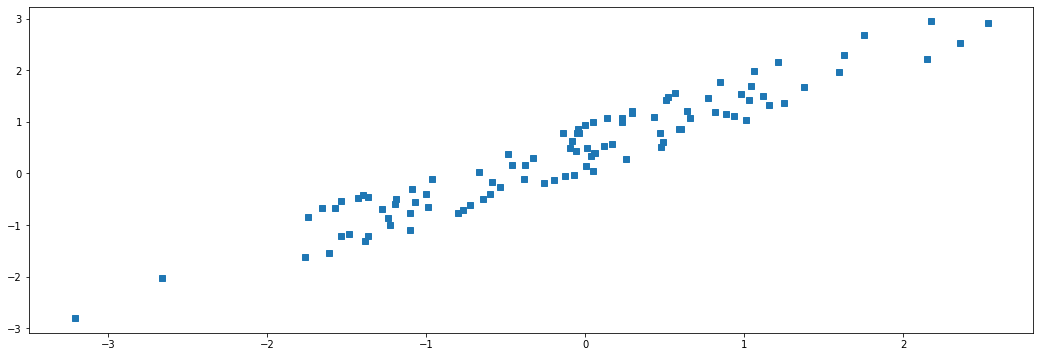

In [25]:
N = 100
x = torch.randn(N, 1)
y = x + torch.rand(N, 1)

# print(x)
# print('')
# print(y)

plt.figure(figsize=(18, 6))
plt.plot(x, y, 's')
plt.show()

# Build model

In [26]:
ANN_reg = nn.Sequential(
    nn.Linear(in_features=1, out_features=1),   # Input layer
    nn.ReLU(),                                  # Activation Function
    nn.Linear(in_features=1, out_features=1)    # Output layer
)

In [27]:
# Model meta-parameters
learning_rate = 0.05

# Loss function
loss_func = nn.MSELoss()

# Optimizer
optimizer = torch.optim.SGD(params=ANN_reg.parameters(), lr=learning_rate)

# Select data for training

In [28]:
# Select training data (note the hard-coded N!)
# Random indices, hardcode trainingset size = 80
train_idx = np.random.choice(a=range(N), size=80, replace=False)
# Initialize vector of Falses'
train_bool = np.zeros(shape=N, dtype=bool)
# Set selected samples to True
train_bool[train_idx] = True

# Show the sizes
print(x[train_bool].shape)
print(x[~train_bool].shape)

x_train = x[train_bool]
y_train = y[train_bool]
x_test = x[~train_bool]
y_test = y[~train_bool]

torch.Size([80, 1])
torch.Size([20, 1])


# Train the model

In [29]:
num_epochs = 500
for epoch_i in range(num_epochs):
  # Forward pass
  y_hat = ANN_reg(x_train)

  # Compute loss
  loss = loss_func(y_hat, y_train)

  # Backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# Report the losses

In [30]:
# Compute losses of the TEST set
pred_y_test = ANN_reg(x_test)
test_loss = (pred_y_test - y_test).pow(2).mean()

# Print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {test_loss.detach():.2f}')

Final TRAIN loss: 0.11
Final TEST loss: 0.15


# Plot the data


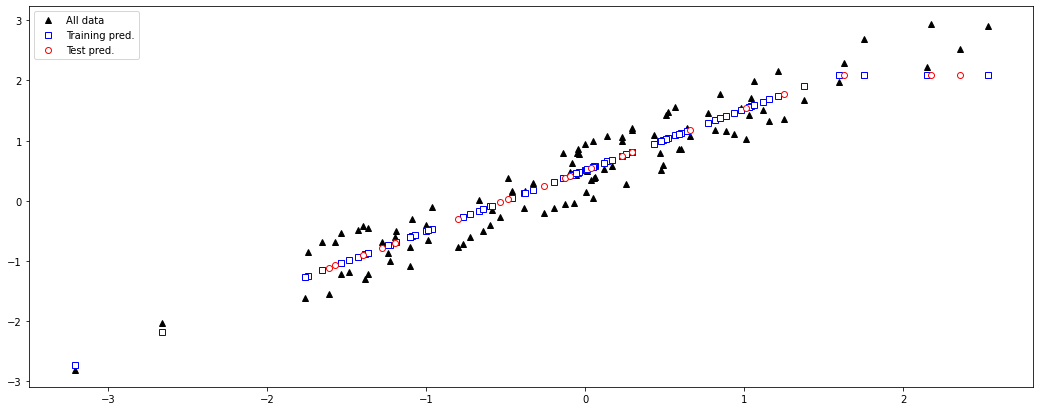

In [31]:
# Predictions for final training run
pred_y_train = ANN_reg(x_train).detach().numpy()

# Now plot
plt.figure(figsize=(18, 7))
plt.plot(x, y, 'k^', label='All data')
plt.plot(x_train, pred_y_train, 'bs', markerfacecolor='w', label='Training pred.')
plt.plot(x_test, pred_y_test.detach(), 'ro', markerfacecolor='w', label='Test pred.')
plt.legend()
plt.show()


# Additional explorations
1) The train/test split is currently hard-coded to be 80/20 (note the number "80"). This is bad coding style, because
   if you change the number of datapoints from N=100 to N=10000, then we're still only training on 80 samples and testing
   on 10000-80=9920 samples. Change how the variable trainBool is created so that it always trains on 80% of the data,
   regardless of the dataset size.

2) Re-write this code to use scikitlearn and/or DataLoader instead of manually separating the data into train/test.

3) Do we really need 500 epochs to train the model? To find out, add code to the training loop to compute the MSEloss 
   for the train and test data on each iteration during training. Then plot the train and test error as a function of
   training epoch. What is your evaluation of an appropriate amount of training for this model/dataset?